In [3]:
import pandas as pd
import numpy as np
import warnings
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
pd.options.display.max_columns
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")                        

# 1) Data preprocessing

In [8]:
anime_df=pd.read_csv("anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
print(f"anime set (row, col): {anime_df.shape}")

anime set (row, col): (12294, 7)


In [10]:
print("Anime:\n")
print(anime_df.info())

Anime:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [12]:
#Handling missing values
print("Anime missing values (%):\n")
print(round(anime_df.isnull().sum().sort_values(ascending=False)/len(anime_df.index),4)*100)

Anime missing values (%):

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64


In [13]:
# deleting anime with 0 rating
anime_df=anime_df[~np.isnan(anime_df["rating"])]

# filling mode value for genre and type
anime_df['genre'] = anime_df['genre'].fillna(
anime_df['genre'].dropna().mode().values[0])

anime_df['type'] = anime_df['type'].fillna(
anime_df['type'].dropna().mode().values[0])

#checking if all null values are filled
anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [14]:
anime_df.groupby('type').first()

,anime_id,name,genre,episodes,rating,members
type,,,,,,
Movie,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
Music,34240,Shelter,"Music, Sci-Fi",1,8.38,71136
ONA,3167,Eve no Jikan,"Sci-Fi, Slice of Life",6,8.26,99074
OVA,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",110,9.11,80679
Special,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",1,8.66,49036
TV,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665


In [15]:
print(anime_df['type'].mode())
print(anime_df['genre'].mode())

0    TV
Name: type, dtype: object
0    Hentai
Name: genre, dtype: object


In [16]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12064 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12064 non-null  int64  
 1   name      12064 non-null  object 
 2   genre     12064 non-null  object 
 3   type      12064 non-null  object 
 4   episodes  12064 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12064 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 754.0+ KB


# 2) Data visualization

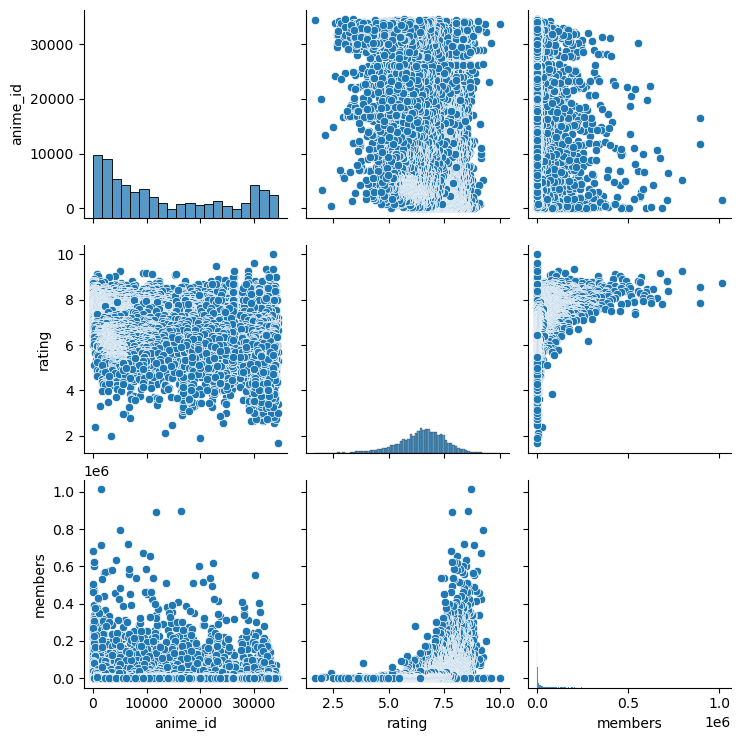

In [17]:
sns.pairplot(anime_df)

# 3) Feature extraction

In [22]:
# Convert 'episodes' to numerical (replace 'Unknown' with NaN)
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce').fillna(0)

# Step 3: Genre Multi-Hot Encoding
genre_dummies = anime_df['genre'].str.get_dummies(sep=', ')

# Step 4: Type One-Hot Encoding
type_dummies = pd.get_dummies(anime_df['type'], prefix='type')

In [24]:
print(anime_df[['name', 'episodes']].head())

                               name  episodes
0                    Kimi no Na wa.       1.0
1  Fullmetal Alchemist: Brotherhood      64.0
2                          Gintama°      51.0
3                       Steins;Gate      24.0
4                     Gintama&#039;      51.0


In [25]:
print(genre_dummies.head())

   Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  \
0       0          0     0       0         0       0      1      0        0   
1       1          1     0       0         0       0      1      0        1   
2       1          0     0       1         0       0      0      0        0   
3       0          0     0       0         0       0      0      0        0   
4       1          0     0       1         0       0      0      0        0   

   Game  ...  Shounen Ai  Slice of Life  Space  Sports  Super Power  \
0     0  ...           0              0      0       0            0   
1     0  ...           0              0      0       0            0   
2     0  ...           0              0      0       0            0   
3     0  ...           0              0      0       0            0   
4     0  ...           0              0      0       0            0   

   Supernatural  Thriller  Vampire  Yaoi  Yuri  
0             1         0        0     0     0  


In [26]:
print(type_dummies.head())

   type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV
0        True       False     False     False         False    False
1       False       False     False     False         False     True
2       False       False     False     False         False     True
3       False       False     False     False         False     True
4       False       False     False     False         False     True


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(anime_df[['rating', 'episodes']])
scaled_df = pd.DataFrame(scaled_features, columns=['scaled_rating', 'scaled_episodes'])

In [30]:
#combine all features
combined_features = pd.concat([genre_dummies, type_dummies, scaled_df], axis=1)

In [32]:
print(combined_features.isnull().sum())

Action             220
Adventure          220
Cars               220
Comedy             220
Dementia           220
Demons             220
Drama              220
Ecchi              220
Fantasy            220
Game               220
Harem              220
Hentai             220
Historical         220
Horror             220
Josei              220
Kids               220
Magic              220
Martial Arts       220
Mecha              220
Military           220
Music              220
Mystery            220
Parody             220
Police             220
Psychological      220
Romance            220
Samurai            220
School             220
Sci-Fi             220
Seinen             220
Shoujo             220
Shoujo Ai          220
Shounen            220
Shounen Ai         220
Slice of Life      220
Space              220
Sports             220
Super Power        220
Supernatural       220
Thriller           220
Vampire            220
Yaoi               220
Yuri               220
type_Movie 

In [34]:
combined_features = combined_features.fillna(0)
print(combined_features.isnull().sum().sum())

0


In [35]:
#computing cosine similarity
cosine_sim = cosine_similarity(combined_features, combined_features)
print(cosine_sim)

[[1.         0.25620886 0.11699926 ... 0.3820335  0.38203406 0.38203431]
 [0.25620886 1.         0.43375463 ... 0.30663655 0.30662654 0.30661635]
 [0.11699926 0.43375463 1.         ... 0.3062719  0.30626405 0.306256  ]
 ...
 [0.3820335  0.30663655 0.3062719  ... 1.         0.9999996  0.9999984 ]
 [0.38203406 0.30662654 0.30626405 ... 0.9999996  1.         0.9999996 ]
 [0.38203431 0.30661635 0.306256   ... 0.9999984  0.9999996  1.        ]]


# 4) Recommendation system

In [41]:
#Recommendation system
def recommend_anime(title, cosine_sim=cosine_sim, anime_df=anime_df):
    idx = anime_df[anime_df['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 similar anime excluding itself
    anime_indices = [i[0] for i in sim_scores]
    return anime_df['name'].iloc[anime_indices]
anime_name = 'Naruto'  
print("Recommendations for:", anime_name)
print(recommend_anime(anime_name))

Recommendations for: Naruto
615        Naruto: Shippuuden
175    Katekyo Hitman Reborn!
206             Dragon Ball Z
588           Dragon Ball Kai
515    Dragon Ball Kai (2014)
Name: name, dtype: object


In [59]:
'''
Interview questions
1. Can you explain the difference between user-based and item-based collaborative filtering?

The difference between user-based and item-based collaborative filtering lies in their focus. 
User-based filtering compares users and suggests items liked by users with similar behavior. 
It is effective when there are many items but may struggle with new or inactive users. 
Item-based filtering compares items and recommends those similar to what the user has interacted with. 
It is generally more stable, scalable, and effective in cases where there are many users but fewer items.
Each approach has its strengths, and the choice depends on the dataset's characteristics and the application's needs.

2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation technique that predicts user preferences by leveraging the interactions between users and items. 
It works by analyzing patterns in a user-item interaction matrix to identify relationships. 
User-based collaborative filtering focuses on finding users with similar preferences and recommending items that those similar users like. 
Item-based collaborative filtering, on the other hand, identifies items similar to those a user has already interacted with and recommends those items. 
'''

"\nInterview questions\n1. Can you explain the difference between user-based and item-based collaborative filtering?\n\nThe difference between user-based and item-based collaborative filtering lies in their focus. \nUser-based filtering compares users and suggests items liked by users with similar behavior. \nIt is effective when there are many items but may struggle with new or inactive users. \nItem-based filtering compares items and recommends those similar to what the user has interacted with. \nIt is generally more stable, scalable, and effective in cases where there are many users but fewer items.\nEach approach has its strengths, and the choice depends on the dataset's characteristics and the application's needs.\n\n2. What is collaborative filtering, and how does it work?\n\nCollaborative filtering is a recommendation technique that predicts user preferences by leveraging the interactions between users and items. \nIt works by analyzing patterns in a user-item interaction matri